In [1]:
"""
This is the first successful trial of Machine Learning Algorithm on the finance dataset solely

The feature include the following trials

    1. Independent value of the stock columns
    2. value multiplied and factored with the change
    3. value factored in itself


"""

'\nThis is the first successful trial of Machine Learning Algorithm on the finance dataset solely\n\nThe feature include the following trials\n\n    1. Independent value of the stock columns\n    2. value multiplied and factored with the change\n    3. value factored in itself\n\n\n'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import talib
import warnings
import os
import time
import datetime
import plotly.graph_objects as go
warnings.filterwarnings('ignore')
import pyfolio

C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
os.chdir("D:\\Project_Kite\\BANKNIFTY\\data\\15min")

In [3]:
files = os.listdir()
l1 = files

In [4]:
def data_coll(i):
    s1 = pd.read_csv(l1[i],index_col='date',parse_dates=True)
    s1.drop(['Unnamed: 0','oi'],axis=1,inplace=True)
    s1.columns = [f"{l1[i][:-3]}open", f"{l1[i][:-3]}high", f"{l1[i][:-3]}low", f"{l1[i][:-3]}close", f"{l1[i][:-3]}volume"]
    s1[f"{l1[i][:-3]}change"] = np.round((s1.iloc[:,3]-s1.iloc[:,0])*100/s1.iloc[:,0],2)
    s1[f"{l1[i][:-3]}value"] = s1.iloc[:,4]*s1.iloc[:,3]
    return s1
df = pd.DataFrame()
for i in range(13):
    df_ = data_coll(i)
    df = pd.concat([df,df_.iloc[:,[5,6]]],axis=1)

In [5]:
df.head()

,AXISBANK.change,AXISBANK.value,BANDHANBNK.change,BANDHANBNK.value,BANKBARODA.change,BANKBARODA.value,FEDERALBNK.change,FEDERALBNK.value,HDFCBANK.change,HDFCBANK.value,...,KOTAKBANK.change,KOTAKBANK.value,NIFTY BANK.change,NIFTY BANK.value,PNB.change,PNB.value,RBLBANK.change,RBLBANK.value,SBIN.change,SBIN.value
date,,,,,,,,,,,,,,,,,,,,,
2020-01-21 09:15:00+05:30,0.06,532276340.8,0.28,68006526.5,0.69,2.823192e+08,1.12,4.416606e+08,-0.53,8.517365e+08,...,-0.16,1.572870e+09,0.18,0.0,0.49,1.369656e+08,2.68,631139225.6,0.62,1.020482e+09
2020-01-21 09:30:00+05:30,0.30,414871752.9,0.03,23937790.0,0.00,9.015447e+07,0.84,3.977784e+08,0.30,5.960753e+08,...,0.69,8.594372e+08,0.26,0.0,0.32,7.768058e+07,0.17,425411398.6,0.11,5.935058e+08
2020-01-21 09:45:00+05:30,-0.29,212934665.0,-0.61,90443447.6,0.21,5.691808e+07,-0.10,2.414063e+08,0.09,3.824391e+08,...,0.05,1.099548e+09,0.12,0.0,0.08,3.462944e+07,0.64,293595632.8,0.22,5.918366e+08
2020-01-21 10:00:00+05:30,-0.10,173020334.0,-0.09,16409929.2,-0.21,6.043111e+07,-0.42,1.222478e+08,-0.12,7.373803e+08,...,-0.65,4.345157e+08,-0.28,0.0,-0.08,3.427400e+07,0.16,455738777.9,-0.47,3.460985e+08
2020-01-21 10:15:00+05:30,-0.25,280825798.0,-0.14,14311935.0,-0.52,7.514150e+07,0.05,1.414328e+08,-0.27,3.251986e+08,...,-0.22,4.228624e+08,-0.29,0.0,-0.48,3.369159e+07,-0.22,217599061.5,-0.44,6.178236e+08


In [6]:
df['change'] = df['NIFTY BANK.change'].shift(-1)
df.dropna(inplace=True)
dfx = df
dfx['chng_lab'] = np.where(((dfx['change'] > 0.5) | (dfx['change'] < -0.5)),0,1)

In [7]:
df.drop('NIFTY BANK.value',axis=1,inplace=True)

In [10]:
dfx

,AXISBANK.change,AXISBANK.value,BANDHANBNK.change,BANDHANBNK.value,BANKBARODA.change,BANKBARODA.value,FEDERALBNK.change,FEDERALBNK.value,HDFCBANK.change,HDFCBANK.value,...,KOTAKBANK.value,NIFTY BANK.change,PNB.change,PNB.value,RBLBANK.change,RBLBANK.value,SBIN.change,SBIN.value,change,chng_lab
date,,,,,,,,,,,,,,,,,,,,,
2020-01-21 09:15:00+05:30,0.06,5.322763e+08,0.28,6.800653e+07,0.69,2.823192e+08,1.12,4.416606e+08,-0.53,8.517365e+08,...,1.572870e+09,0.18,0.49,1.369656e+08,2.68,631139225.6,0.62,1.020482e+09,0.26,1
2020-01-21 09:30:00+05:30,0.30,4.148718e+08,0.03,2.393779e+07,0.00,9.015447e+07,0.84,3.977784e+08,0.30,5.960753e+08,...,8.594372e+08,0.26,0.32,7.768058e+07,0.17,425411398.6,0.11,5.935058e+08,0.12,1
2020-01-21 09:45:00+05:30,-0.29,2.129347e+08,-0.61,9.044345e+07,0.21,5.691808e+07,-0.10,2.414063e+08,0.09,3.824391e+08,...,1.099548e+09,0.12,0.08,3.462944e+07,0.64,293595632.8,0.22,5.918366e+08,-0.28,1
2020-01-21 10:00:00+05:30,-0.10,1.730203e+08,-0.09,1.640993e+07,-0.21,6.043111e+07,-0.42,1.222478e+08,-0.12,7.373803e+08,...,4.345157e+08,-0.28,-0.08,3.427400e+07,0.16,455738777.9,-0.47,3.460985e+08,-0.29,1
2020-01-21 10:15:00+05:30,-0.25,2.808258e+08,-0.14,1.431194e+07,-0.52,7.514150e+07,0.05,1.414328e+08,-0.27,3.251986e+08,...,4.228624e+08,-0.29,-0.48,3.369159e+07,-0.22,217599061.5,-0.44,6.178236e+08,-0.09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-17 14:00:00+05:30,0.20,4.871447e+08,0.33,7.801920e+07,0.10,2.591394e+07,0.39,3.889701e+07,0.23,3.808062e+08,...,2.715331e+08,0.20,-0.15,1.096258e+07,0.54,156120306.3,0.19,2.009856e+08,0.18,1
2020-07-17 14:15:00+05:30,0.15,4.005610e+08,0.06,6.988434e+07,0.21,1.311668e+07,0.00,4.581198e+07,0.31,5.089788e+08,...,1.538535e+08,0.18,0.00,6.696280e+06,0.03,106633290.0,0.03,2.239772e+08,0.29,1
2020-07-17 14:30:00+05:30,0.16,4.839240e+08,0.41,1.169170e+08,0.31,2.372266e+07,0.00,9.679417e+07,0.36,6.560294e+08,...,1.274989e+08,0.29,0.30,1.349985e+07,0.15,97160561.8,0.30,2.335309e+08,0.32,1


In [11]:
def variable_correlation(df):
    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(df.corr(), center=0, cmap="BrBG", annot=True)

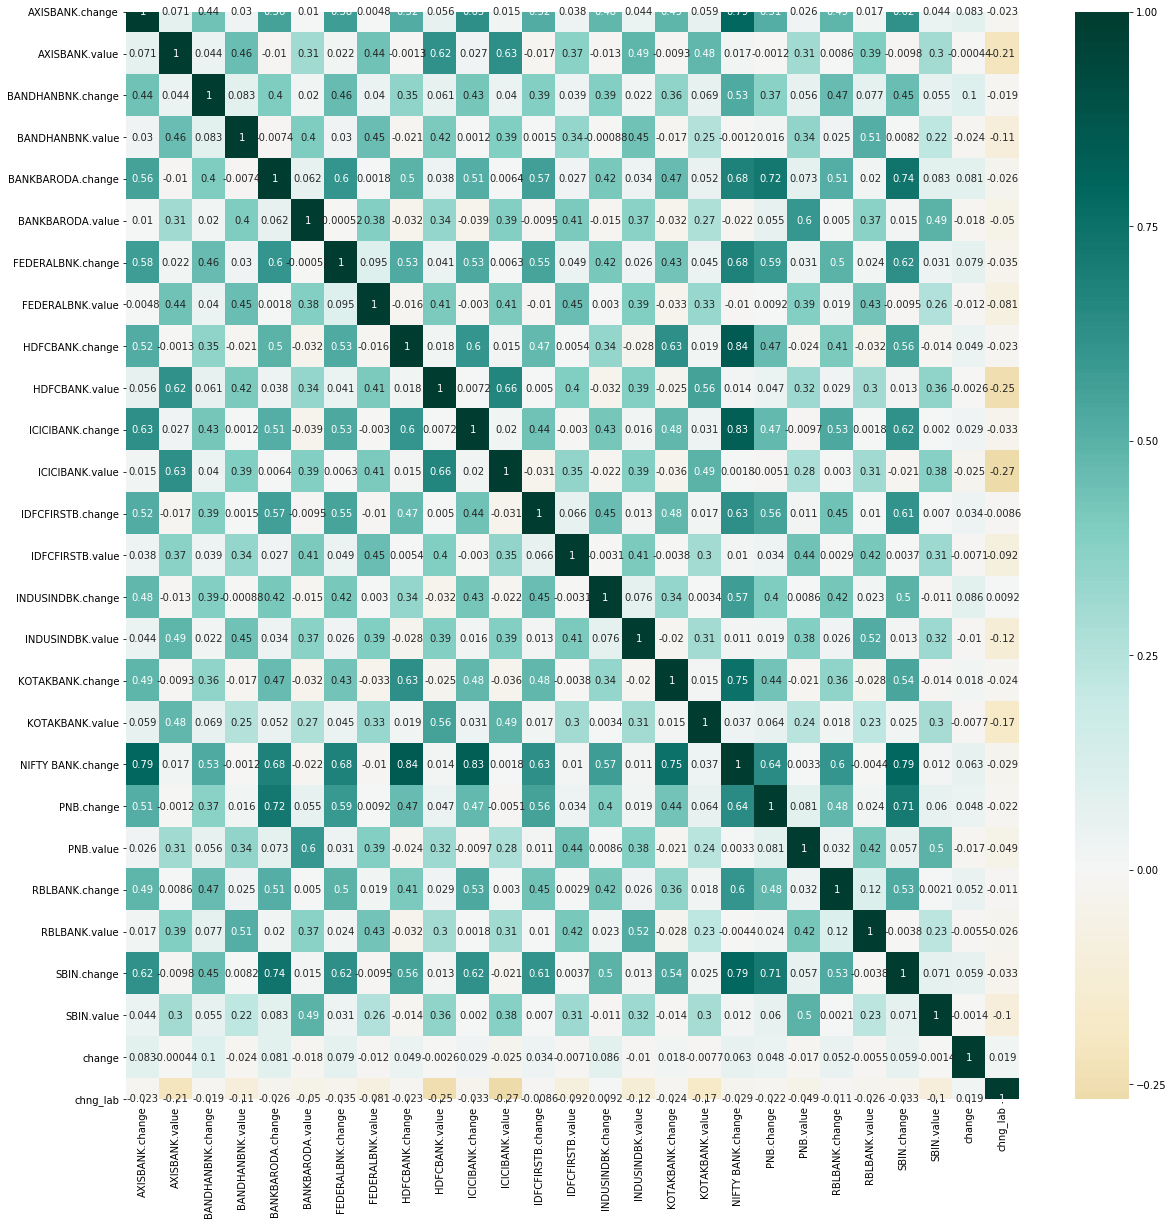

In [12]:
variable_correlation(dfx)

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
sc = StandardScaler()

In [11]:
x = sc.fit_transform(x)

In [48]:
from sklearn.model_selection import train_test_split
x = dfx.iloc[:,:-2].values
y = dfx.iloc[:,-1].values
#

In [49]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25)

In [50]:
xtrain[:,[1,3,5,7,9,11,13,15,17,20,22,24]] = sc.fit_transform(xtrain[:,[1,3,5,7,9,11,13,15,17,20,22,24]])

In [51]:
xtest[:,[1,3,5,7,9,11,13,15,17,20,22,24]] = sc.transform(xtest[:,[1,3,5,7,9,11,13,15,17,20,22,24]])

In [52]:
xtrain = sc.fit_transform(xtrain)

In [53]:
xtest = sc.transform(xtest)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
x = dfx.iloc[:,:-2].values
y = dfx.iloc[:,-1].values
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score

# Logistic Regression
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
yp_lr = lr.predict(xtest)

print("Accuracy score for Logistic Regression")
print(accuracy_score(ytest,yp_lr))
print(classification_report(ytest,yp_lr))
print(confusion_matrix(ytest,yp_lr))
print("*"*35)

# Support Vector Machines
svc = SVC(kernel='linear')
svc.fit(xtrain,ytrain)
yp_svc = svc.predict(xtest)

print("Accuracy score for Support Vector Machines")
print(accuracy_score(ytest,yp_svc))
print(classification_report(ytest,yp_svc))
print(confusion_matrix(ytest,yp_svc))
print("*"*35)

# Kernel Support Vector Machines
ksvm = SVC(kernel='rbf')
ksvm.fit(xtrain,ytrain)
yp_ksvc = ksvm.predict(xtest)

print("Accuracy score for Support Vector Machines kernel = rbf")
print(accuracy_score(ytest,yp_ksvc))
print(classification_report(ytest,yp_ksvc))
print(confusion_matrix(ytest,yp_ksvc))
print("*"*35)

# Kernel-2 Support Vector Machines
ssvm = SVC(kernel='sigmoid')
ssvm.fit(xtrain,ytrain)
yp_ssvc = ksvm.predict(xtest)

print("Accuracy score for Support Vector Machines, kernel = sigmoid")
print(accuracy_score(ytest,yp_ssvc))
print(classification_report(ytest,yp_ssvc))
print(confusion_matrix(ytest,yp_ssvc))
print("*"*35)

# k- Neighbours Classifier
knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(xtrain,ytrain)
yp_knn= knn.predict(xtest)

print("Performance report for k Nearest Neighbours")
print(accuracy_score(ytest,yp_knn))
print(classification_report(ytest,yp_knn))
print(confusion_matrix(ytest,yp_knn))
print("*"*35)

# Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(xtrain,ytrain)
yp_gnb = gnb.predict(xtest)

print("Performance Report for Gaussian Naive Bayes Classifier")
print(accuracy_score(ytest,yp_gnb))
print(classification_report(ytest,yp_gnb))
print(confusion_matrix(ytest,yp_gnb))
print("*"*35)

# Decision Tree Classifier
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(xtrain,ytrain)
yp_dtc = dtc.predict(xtest)

print("Performance Report for Decision Tree Classifier")
print(accuracy_score(ytest,yp_dtc))
print(classification_report(ytest,yp_dtc))
print(confusion_matrix(ytest,yp_dtc))
print("*"*35)

# Random Forest Classifier
rfc = RandomForestClassifier(criterion='entropy')
rfc.fit(xtrain,ytrain)
yp_rfc = rfc.predict(xtest)

print("Performance Report for Random Forest Classifier")
print(accuracy_score(ytest,yp_rfc))
print(classification_report(ytest,yp_rfc))
print(confusion_matrix(ytest,yp_rfc))
print("*"*35)

clf = RandomForestClassifier(criterion='gini')
scores = cross_val_score(clf, x, y, cv=7)
scores


Accuracy score for Logistic Regression
0.5361366622864652
              precision    recall  f1-score   support

           0       0.55      0.93      0.69       430
           1       0.24      0.03      0.05       331

    accuracy                           0.54       761
   macro avg       0.40      0.48      0.37       761
weighted avg       0.42      0.54      0.41       761

[[398  32]
 [321  10]]
***********************************
Accuracy score for Support Vector Machines
0.5650459921156373
              precision    recall  f1-score   support

           0       0.57      1.00      0.72       430
           1       0.00      0.00      0.00       331

    accuracy                           0.57       761
   macro avg       0.28      0.50      0.36       761
weighted avg       0.32      0.57      0.41       761

[[430   0]
 [331   0]]
***********************************
Accuracy score for Support Vector Machines kernel = rbf
0.6044678055190539
              precision    recall

array([0.58486239, 0.68275862, 0.68275862, 0.50230415, 0.5437788 ,
       0.51843318, 0.55069124])

In [10]:
import joblib

In [9]:
os.chdir("D:\\Project_Kite\\BANKNIFTY\\models\\20-7-20")

In [27]:
joblib.dump(gnb, "Naive_Bayes.pkl")

['Naive_Bayes.pkl']

### Testing the model

# Artificial Neural Network

In [56]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [57]:
ann = Sequential()


In [58]:
ann.add(Dense(units=6,activation='relu'))
ann.add(Dense(units=60,activation='relu'))
ann.add(Dense(units=60,activation='relu'))
ann.add(Dense(units=1,activation='sigmoid'))
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [87]:
ann.fit(xtrain,ytrain,batch_size=32,epochs=5500)

Train on 2281 samples
Epoch 1/5500
2281/2281 [==============================] - 0s 77us/sample - loss: 0.1025 - accuracy: 0.9584
Epoch 2/5500
2281/2281 [==============================] - 0s 82us/sample - loss: 0.1214 - accuracy: 0.9513
Epoch 3/5500
2281/2281 [==============================] - 0s 85us/sample - loss: 0.1108 - accuracy: 0.9566
Epoch 4/5500
2281/2281 [==============================] - 0s 85us/sample - loss: 0.1252 - accuracy: 0.9540
Epoch 5/5500
2281/2281 [==============================] - 0s 82us/sample - loss: 0.1039 - accuracy: 0.9610
Epoch 6/5500
2281/2281 [==============================] - 0s 79us/sample - loss: 0.1054 - accuracy: 0.9610
Epoch 7/5500
2281/2281 [==============================] - 0s 84us/sample - loss: 0.1049 - accuracy: 0.9627
Epoch 8/5500
2281/2281 [==============================] - 0s 83us/sample - loss: 0.1024 - accuracy: 0.9610
Epoch 9/5500
2281/2281 [==============================] - 0s 80us/sample - loss: 0.1052 - accuracy: 0.9627
Epoch 10/5500
2

Epoch 76/5500
2281/2281 [==============================] - 0s 127us/sample - loss: 0.0973 - accuracy: 0.9619
Epoch 77/5500
2281/2281 [==============================] - 0s 130us/sample - loss: 0.0970 - accuracy: 0.9619
Epoch 78/5500
2281/2281 [==============================] - 0s 138us/sample - loss: 0.0988 - accuracy: 0.9632
Epoch 79/5500
2281/2281 [==============================] - 0s 133us/sample - loss: 0.0940 - accuracy: 0.9636
Epoch 80/5500
2281/2281 [==============================] - 0s 140us/sample - loss: 0.0978 - accuracy: 0.9610
Epoch 81/5500
2281/2281 [==============================] - 0s 138us/sample - loss: 0.0928 - accuracy: 0.9662
Epoch 82/5500
2281/2281 [==============================] - 0s 151us/sample - loss: 0.1103 - accuracy: 0.9601
Epoch 83/5500
2281/2281 [==============================] - 0s 127us/sample - loss: 0.0969 - accuracy: 0.9671
Epoch 84/5500
2281/2281 [==============================] - 0s 59us/sample - loss: 0.0900 - accuracy: 0.9693
Epoch 85/5500
2281/2

2281/2281 [==============================] - 0s 107us/sample - loss: 0.0981 - accuracy: 0.9588
Epoch 152/5500
2281/2281 [==============================] - 0s 117us/sample - loss: 0.0877 - accuracy: 0.9693
Epoch 153/5500
2281/2281 [==============================] - 0s 109us/sample - loss: 0.0927 - accuracy: 0.9636
Epoch 154/5500
2281/2281 [==============================] - 0s 126us/sample - loss: 0.0926 - accuracy: 0.9654
Epoch 155/5500
2281/2281 [==============================] - 0s 128us/sample - loss: 0.1281 - accuracy: 0.9487
Epoch 156/5500
2281/2281 [==============================] - 0s 128us/sample - loss: 0.1050 - accuracy: 0.9614
Epoch 157/5500
2281/2281 [==============================] - 0s 130us/sample - loss: 0.0902 - accuracy: 0.9676
Epoch 158/5500
2281/2281 [==============================] - 0s 124us/sample - loss: 0.0868 - accuracy: 0.9702
Epoch 159/5500
2281/2281 [==============================] - 0s 127us/sample - loss: 0.0886 - accuracy: 0.9689
Epoch 160/5500
2281/2281 

2281/2281 [==============================] - 0s 133us/sample - loss: 0.0779 - accuracy: 0.9715
Epoch 300/5500
2281/2281 [==============================] - 0s 113us/sample - loss: 0.0784 - accuracy: 0.9680
Epoch 301/5500
2281/2281 [==============================] - 0s 113us/sample - loss: 0.0746 - accuracy: 0.9750
Epoch 302/5500
2281/2281 [==============================] - 0s 132us/sample - loss: 0.0722 - accuracy: 0.9728
Epoch 303/5500
2281/2281 [==============================] - 0s 133us/sample - loss: 0.0740 - accuracy: 0.9763
Epoch 304/5500
2281/2281 [==============================] - 0s 131us/sample - loss: 0.0733 - accuracy: 0.9746
Epoch 305/5500
2281/2281 [==============================] - 0s 114us/sample - loss: 0.0825 - accuracy: 0.9689 - loss: 0.0788 - accuracy: 
Epoch 306/5500
2281/2281 [==============================] - 0s 136us/sample - loss: 0.0844 - accuracy: 0.9693
Epoch 307/5500
2281/2281 [==============================] - 0s 127us/sample - loss: 0.0771 - accuracy: 0.97

2281/2281 [==============================] - 0s 110us/sample - loss: 0.0911 - accuracy: 0.9662
Epoch 448/5500
2281/2281 [==============================] - 0s 113us/sample - loss: 0.1125 - accuracy: 0.9584
Epoch 449/5500
2281/2281 [==============================] - 0s 109us/sample - loss: 0.0805 - accuracy: 0.9724
Epoch 450/5500
2281/2281 [==============================] - 0s 114us/sample - loss: 0.0738 - accuracy: 0.9746
Epoch 451/5500
2281/2281 [==============================] - 0s 112us/sample - loss: 0.0780 - accuracy: 0.9724
Epoch 452/5500
2281/2281 [==============================] - 0s 107us/sample - loss: 0.0804 - accuracy: 0.9715
Epoch 453/5500
2281/2281 [==============================] - 0s 120us/sample - loss: 0.0813 - accuracy: 0.9671
Epoch 454/5500
2281/2281 [==============================] - 0s 123us/sample - loss: 0.0755 - accuracy: 0.9728
Epoch 455/5500
2281/2281 [==============================] - 0s 113us/sample - loss: 0.0716 - accuracy: 0.9724
Epoch 456/5500
2281/2281 

2281/2281 [==============================] - 0s 126us/sample - loss: 0.0771 - accuracy: 0.9711
Epoch 596/5500
2281/2281 [==============================] - 0s 128us/sample - loss: 0.0751 - accuracy: 0.9693
Epoch 597/5500
2281/2281 [==============================] - 0s 121us/sample - loss: 0.0966 - accuracy: 0.9676
Epoch 598/5500
2281/2281 [==============================] - 0s 123us/sample - loss: 0.0863 - accuracy: 0.9597
Epoch 599/5500
2281/2281 [==============================] - 0s 127us/sample - loss: 0.1346 - accuracy: 0.9562
Epoch 600/5500
2281/2281 [==============================] - 0s 129us/sample - loss: 0.1094 - accuracy: 0.9579
Epoch 601/5500
2281/2281 [==============================] - 0s 117us/sample - loss: 0.0679 - accuracy: 0.9768
Epoch 602/5500
2281/2281 [==============================] - 0s 117us/sample - loss: 0.0658 - accuracy: 0.9772
Epoch 603/5500
2281/2281 [==============================] - 0s 124us/sample - loss: 0.0695 - accuracy: 0.9741
Epoch 604/5500
2281/2281 

2281/2281 [==============================] - 0s 150us/sample - loss: 0.0570 - accuracy: 0.9803
Epoch 744/5500
2281/2281 [==============================] - 0s 137us/sample - loss: 0.0687 - accuracy: 0.9781
Epoch 745/5500
2281/2281 [==============================] - 0s 104us/sample - loss: 0.0577 - accuracy: 0.9807
Epoch 746/5500
2281/2281 [==============================] - 0s 118us/sample - loss: 0.0604 - accuracy: 0.9803
Epoch 747/5500
2281/2281 [==============================] - 0s 160us/sample - loss: 0.0488 - accuracy: 0.9855
Epoch 748/5500
2281/2281 [==============================] - 0s 183us/sample - loss: 0.0581 - accuracy: 0.9798
Epoch 749/5500
2281/2281 [==============================] - 0s 137us/sample - loss: 0.0596 - accuracy: 0.9803
Epoch 750/5500
2281/2281 [==============================] - 0s 130us/sample - loss: 0.0544 - accuracy: 0.9803
Epoch 751/5500
2281/2281 [==============================] - 0s 134us/sample - loss: 0.0706 - accuracy: 0.9741
Epoch 752/5500
2281/2281 

2281/2281 [==============================] - 0s 111us/sample - loss: 0.0556 - accuracy: 0.9798
Epoch 892/5500
2281/2281 [==============================] - 0s 114us/sample - loss: 0.0547 - accuracy: 0.9811
Epoch 893/5500
2281/2281 [==============================] - 0s 106us/sample - loss: 0.0527 - accuracy: 0.9803
Epoch 894/5500
2281/2281 [==============================] - 0s 109us/sample - loss: 0.0637 - accuracy: 0.9750
Epoch 895/5500
2281/2281 [==============================] - 0s 106us/sample - loss: 0.0651 - accuracy: 0.9768
Epoch 896/5500
2281/2281 [==============================] - 0s 107us/sample - loss: 0.0626 - accuracy: 0.9798
Epoch 897/5500
2281/2281 [==============================] - 0s 106us/sample - loss: 0.0802 - accuracy: 0.9715
Epoch 898/5500
2281/2281 [==============================] - 0s 107us/sample - loss: 0.0739 - accuracy: 0.9728
Epoch 899/5500
2281/2281 [==============================] - 0s 107us/sample - loss: 0.0816 - accuracy: 0.9719
Epoch 900/5500
2281/2281 

2281/2281 [==============================] - 0s 153us/sample - loss: 0.0528 - accuracy: 0.9798
Epoch 1040/5500
2281/2281 [==============================] - 0s 148us/sample - loss: 0.0519 - accuracy: 0.9855
Epoch 1041/5500
2281/2281 [==============================] - 0s 135us/sample - loss: 0.0550 - accuracy: 0.9772
Epoch 1042/5500
2281/2281 [==============================] - 0s 132us/sample - loss: 0.0422 - accuracy: 0.9842
Epoch 1043/5500
2281/2281 [==============================] - 0s 138us/sample - loss: 0.0463 - accuracy: 0.9842
Epoch 1044/5500
2281/2281 [==============================] - 0s 150us/sample - loss: 0.0481 - accuracy: 0.9855
Epoch 1045/5500
2281/2281 [==============================] - 0s 161us/sample - loss: 0.0491 - accuracy: 0.9829
Epoch 1046/5500
2281/2281 [==============================] - 0s 149us/sample - loss: 0.0480 - accuracy: 0.9829
Epoch 1047/5500
2281/2281 [==============================] - 0s 133us/sample - loss: 0.0471 - accuracy: 0.9855
Epoch 1048/5500
2

Epoch 1186/5500
2281/2281 [==============================] - 0s 104us/sample - loss: 0.0411 - accuracy: 0.9868
Epoch 1187/5500
2281/2281 [==============================] - 0s 97us/sample - loss: 0.0485 - accuracy: 0.9807
Epoch 1188/5500
2281/2281 [==============================] - 0s 124us/sample - loss: 0.0420 - accuracy: 0.9855
Epoch 1189/5500
2281/2281 [==============================] - 0s 121us/sample - loss: 0.0464 - accuracy: 0.9838
Epoch 1190/5500
2281/2281 [==============================] - 0s 129us/sample - loss: 0.0570 - accuracy: 0.9803
Epoch 1191/5500
2281/2281 [==============================] - 0s 114us/sample - loss: 0.0725 - accuracy: 0.9785
Epoch 1192/5500
2281/2281 [==============================] - 0s 117us/sample - loss: 0.0863 - accuracy: 0.9684
Epoch 1193/5500
2281/2281 [==============================] - 0s 146us/sample - loss: 0.0676 - accuracy: 0.9733
Epoch 1194/5500
2281/2281 [==============================] - 0s 149us/sample - loss: 0.0540 - accuracy: 0.9803
Ep

2281/2281 [==============================] - 0s 120us/sample - loss: 0.0479 - accuracy: 0.9820
Epoch 1334/5500
2281/2281 [==============================] - 0s 116us/sample - loss: 0.0492 - accuracy: 0.9833
Epoch 1335/5500
2281/2281 [==============================] - 0s 119us/sample - loss: 0.0546 - accuracy: 0.9807
Epoch 1336/5500
2281/2281 [==============================] - 0s 114us/sample - loss: 0.0716 - accuracy: 0.9733
Epoch 1337/5500
2281/2281 [==============================] - 0s 113us/sample - loss: 0.1165 - accuracy: 0.9627
Epoch 1338/5500
2281/2281 [==============================] - 0s 119us/sample - loss: 0.0879 - accuracy: 0.9706
Epoch 1339/5500
2281/2281 [==============================] - 0s 122us/sample - loss: 0.0833 - accuracy: 0.9702
Epoch 1340/5500
2281/2281 [==============================] - 0s 118us/sample - loss: 0.0503 - accuracy: 0.9811
Epoch 1341/5500
2281/2281 [==============================] - 0s 109us/sample - loss: 0.0439 - accuracy: 0.9860
Epoch 1342/5500
2

2281/2281 [==============================] - 0s 89us/sample - loss: 0.0756 - accuracy: 0.9715
Epoch 1481/5500
2281/2281 [==============================] - 0s 103us/sample - loss: 0.0615 - accuracy: 0.9781
Epoch 1482/5500
2281/2281 [==============================] - 0s 111us/sample - loss: 0.0413 - accuracy: 0.9847
Epoch 1483/5500
2281/2281 [==============================] - 0s 135us/sample - loss: 0.0443 - accuracy: 0.9860
Epoch 1484/5500
2281/2281 [==============================] - 0s 129us/sample - loss: 0.0390 - accuracy: 0.9882
Epoch 1485/5500
2281/2281 [==============================] - 0s 121us/sample - loss: 0.0444 - accuracy: 0.9855
Epoch 1486/5500
2281/2281 [==============================] - 0s 85us/sample - loss: 0.0375 - accuracy: 0.9890
Epoch 1487/5500
2281/2281 [==============================] - 0s 118us/sample - loss: 0.0361 - accuracy: 0.9868
Epoch 1488/5500
2281/2281 [==============================] - 0s 114us/sample - loss: 0.0416 - accuracy: 0.9864
Epoch 1489/5500
228

Epoch 1554/5500
2281/2281 [==============================] - 0s 118us/sample - loss: 0.0449 - accuracy: 0.9860
Epoch 1555/5500
2281/2281 [==============================] - 0s 129us/sample - loss: 0.0411 - accuracy: 0.9847
Epoch 1556/5500
2281/2281 [==============================] - 0s 125us/sample - loss: 0.0368 - accuracy: 0.9868
Epoch 1557/5500
2281/2281 [==============================] - 0s 127us/sample - loss: 0.0452 - accuracy: 0.9847
Epoch 1558/5500
2281/2281 [==============================] - 0s 127us/sample - loss: 0.0342 - accuracy: 0.9904
Epoch 1559/5500
2281/2281 [==============================] - 0s 126us/sample - loss: 0.0358 - accuracy: 0.9868
Epoch 1560/5500
2281/2281 [==============================] - 0s 138us/sample - loss: 0.0378 - accuracy: 0.9877
Epoch 1561/5500
2281/2281 [==============================] - 0s 98us/sample - loss: 0.0402 - accuracy: 0.9847
Epoch 1562/5500
2281/2281 [==============================] - 0s 91us/sample - loss: 0.0424 - accuracy: 0.9842
Epo

2281/2281 [==============================] - 0s 133us/sample - loss: 0.0567 - accuracy: 0.9829
Epoch 1701/5500
2281/2281 [==============================] - 0s 124us/sample - loss: 0.0576 - accuracy: 0.9768
Epoch 1702/5500
2281/2281 [==============================] - 0s 113us/sample - loss: 0.0634 - accuracy: 0.9790
Epoch 1703/5500
2281/2281 [==============================] - 0s 110us/sample - loss: 0.0452 - accuracy: 0.9855
Epoch 1704/5500
2281/2281 [==============================] - 0s 113us/sample - loss: 0.0439 - accuracy: 0.9868
Epoch 1705/5500
2281/2281 [==============================] - 0s 113us/sample - loss: 0.0432 - accuracy: 0.9851
Epoch 1706/5500
2281/2281 [==============================] - 0s 114us/sample - loss: 0.0468 - accuracy: 0.9851
Epoch 1707/5500
2281/2281 [==============================] - 0s 99us/sample - loss: 0.0334 - accuracy: 0.9899
Epoch 1708/5500
2281/2281 [==============================] - 0s 105us/sample - loss: 0.0421 - accuracy: 0.9842
Epoch 1709/5500
22

2281/2281 [==============================] - 0s 108us/sample - loss: 0.0314 - accuracy: 0.9912
Epoch 1849/5500
2281/2281 [==============================] - 0s 102us/sample - loss: 0.0367 - accuracy: 0.9860
Epoch 1850/5500
2281/2281 [==============================] - 0s 104us/sample - loss: 0.0361 - accuracy: 0.9855
Epoch 1851/5500
2281/2281 [==============================] - 0s 106us/sample - loss: 0.0352 - accuracy: 0.9868
Epoch 1852/5500
2281/2281 [==============================] - 0s 106us/sample - loss: 0.0416 - accuracy: 0.9855
Epoch 1853/5500
2281/2281 [==============================] - 0s 110us/sample - loss: 0.0362 - accuracy: 0.9864
Epoch 1854/5500
2281/2281 [==============================] - 0s 107us/sample - loss: 0.0351 - accuracy: 0.9868
Epoch 1855/5500
2281/2281 [==============================] - 0s 104us/sample - loss: 0.0392 - accuracy: 0.9855
Epoch 1856/5500
2281/2281 [==============================] - 0s 105us/sample - loss: 0.0351 - accuracy: 0.9912
Epoch 1857/5500
2

2281/2281 [==============================] - 0s 139us/sample - loss: 0.0359 - accuracy: 0.9877
Epoch 1995/5500
2281/2281 [==============================] - 0s 139us/sample - loss: 0.0334 - accuracy: 0.9882
Epoch 1996/5500
2281/2281 [==============================] - 0s 143us/sample - loss: 0.0336 - accuracy: 0.9886
Epoch 1997/5500
2281/2281 [==============================] - 0s 136us/sample - loss: 0.0357 - accuracy: 0.9851
Epoch 1998/5500
2281/2281 [==============================] - 0s 139us/sample - loss: 0.0372 - accuracy: 0.9873
Epoch 1999/5500
2281/2281 [==============================] - 0s 160us/sample - loss: 0.0309 - accuracy: 0.9908
Epoch 2000/5500
2281/2281 [==============================] - 0s 187us/sample - loss: 0.0339 - accuracy: 0.9877
Epoch 2001/5500
2281/2281 [==============================] - 0s 133us/sample - loss: 0.0803 - accuracy: 0.9754
Epoch 2002/5500
2281/2281 [==============================] - 0s 192us/sample - loss: 0.1541 - accuracy: 0.9566
Epoch 2003/5500
2

Epoch 2141/5500
2281/2281 [==============================] - 0s 139us/sample - loss: 0.0330 - accuracy: 0.9890
Epoch 2142/5500
2281/2281 [==============================] - 0s 161us/sample - loss: 0.0364 - accuracy: 0.9886
Epoch 2143/5500
2281/2281 [==============================] - 0s 144us/sample - loss: 0.0287 - accuracy: 0.9930
Epoch 2144/5500
2281/2281 [==============================] - 0s 144us/sample - loss: 0.0369 - accuracy: 0.9868
Epoch 2145/5500
2281/2281 [==============================] - 0s 146us/sample - loss: 0.0330 - accuracy: 0.9882
Epoch 2146/5500
2281/2281 [==============================] - 0s 153us/sample - loss: 0.0752 - accuracy: 0.9728
Epoch 2147/5500
2281/2281 [==============================] - 0s 145us/sample - loss: 0.1871 - accuracy: 0.9483
Epoch 2148/5500
2281/2281 [==============================] - 0s 139us/sample - loss: 0.1573 - accuracy: 0.9509
Epoch 2149/5500
2281/2281 [==============================] - 0s 149us/sample - loss: 0.0919 - accuracy: 0.9671
E

2281/2281 [==============================] - 0s 98us/sample - loss: 0.0317 - accuracy: 0.9904
Epoch 2288/5500
2281/2281 [==============================] - 0s 134us/sample - loss: 0.0365 - accuracy: 0.9873
Epoch 2289/5500
2281/2281 [==============================] - 0s 131us/sample - loss: 0.0302 - accuracy: 0.9912
Epoch 2290/5500
2281/2281 [==============================] - 0s 133us/sample - loss: 0.1088 - accuracy: 0.9614
Epoch 2291/5500
2281/2281 [==============================] - 0s 134us/sample - loss: 0.0692 - accuracy: 0.9719
Epoch 2292/5500
2281/2281 [==============================] - 0s 131us/sample - loss: 0.0668 - accuracy: 0.9776
Epoch 2293/5500
2281/2281 [==============================] - 0s 127us/sample - loss: 0.0592 - accuracy: 0.9794
Epoch 2294/5500
2281/2281 [==============================] - 0s 143us/sample - loss: 0.1277 - accuracy: 0.9645
Epoch 2295/5500
2281/2281 [==============================] - 0s 138us/sample - loss: 0.1266 - accuracy: 0.9649
Epoch 2296/5500
22

2281/2281 [==============================] - 0s 107us/sample - loss: 0.0742 - accuracy: 0.9798
Epoch 2362/5500
2281/2281 [==============================] - 0s 109us/sample - loss: 0.1380 - accuracy: 0.9641
Epoch 2363/5500
2281/2281 [==============================] - 0s 108us/sample - loss: 0.0529 - accuracy: 0.9794
Epoch 2364/5500
2281/2281 [==============================] - 0s 106us/sample - loss: 0.0830 - accuracy: 0.9711
Epoch 2365/5500
2281/2281 [==============================] - 0s 108us/sample - loss: 0.0540 - accuracy: 0.9776
Epoch 2366/5500
2281/2281 [==============================] - 0s 100us/sample - loss: 0.0465 - accuracy: 0.9838
Epoch 2367/5500
2281/2281 [==============================] - 0s 102us/sample - loss: 0.0441 - accuracy: 0.9868
Epoch 2368/5500
2281/2281 [==============================] - 0s 102us/sample - loss: 0.0357 - accuracy: 0.9877
Epoch 2369/5500
2281/2281 [==============================] - 0s 105us/sample - loss: 0.0400 - accuracy: 0.9873
Epoch 2370/5500
2

Epoch 2509/5500
2281/2281 [==============================] - 0s 125us/sample - loss: 0.0293 - accuracy: 0.9908
Epoch 2510/5500
2281/2281 [==============================] - 0s 122us/sample - loss: 0.0376 - accuracy: 0.9864
Epoch 2511/5500
2281/2281 [==============================] - 0s 129us/sample - loss: 0.0264 - accuracy: 0.9925
Epoch 2512/5500
2281/2281 [==============================] - 0s 125us/sample - loss: 0.0290 - accuracy: 0.9886
Epoch 2513/5500
2281/2281 [==============================] - 0s 125us/sample - loss: 0.0324 - accuracy: 0.9912
Epoch 2514/5500
2281/2281 [==============================] - 0s 123us/sample - loss: 0.0302 - accuracy: 0.9895
Epoch 2515/5500
2281/2281 [==============================] - 0s 124us/sample - loss: 0.0261 - accuracy: 0.9895
Epoch 2516/5500
2281/2281 [==============================] - 0s 123us/sample - loss: 0.0284 - accuracy: 0.9921
Epoch 2517/5500
2281/2281 [==============================] - 0s 126us/sample - loss: 0.0266 - accuracy: 0.9912
E

Epoch 2656/5500
2281/2281 [==============================] - 0s 122us/sample - loss: 0.0275 - accuracy: 0.9904
Epoch 2657/5500
2281/2281 [==============================] - 0s 122us/sample - loss: 0.0299 - accuracy: 0.9895
Epoch 2658/5500
2281/2281 [==============================] - 0s 122us/sample - loss: 0.1003 - accuracy: 0.9689
Epoch 2659/5500
2281/2281 [==============================] - 0s 122us/sample - loss: 0.0986 - accuracy: 0.9711
Epoch 2660/5500
2281/2281 [==============================] - 0s 124us/sample - loss: 0.0621 - accuracy: 0.9794
Epoch 2661/5500
2281/2281 [==============================] - 0s 125us/sample - loss: 0.0771 - accuracy: 0.9768
Epoch 2662/5500
2281/2281 [==============================] - 0s 127us/sample - loss: 0.0487 - accuracy: 0.9825
Epoch 2663/5500
2281/2281 [==============================] - 0s 126us/sample - loss: 0.0324 - accuracy: 0.9860
Epoch 2664/5500
2281/2281 [==============================] - 0s 123us/sample - loss: 0.0301 - accuracy: 0.9890
E

Epoch 2803/5500
2281/2281 [==============================] - 0s 125us/sample - loss: 0.0337 - accuracy: 0.9890
Epoch 2804/5500
2281/2281 [==============================] - 0s 122us/sample - loss: 0.0335 - accuracy: 0.9882
Epoch 2805/5500
2281/2281 [==============================] - 0s 128us/sample - loss: 0.2214 - accuracy: 0.9553
Epoch 2806/5500
2281/2281 [==============================] - 0s 123us/sample - loss: 0.2034 - accuracy: 0.9443
Epoch 2807/5500
2281/2281 [==============================] - 0s 123us/sample - loss: 0.0939 - accuracy: 0.9698
Epoch 2808/5500
2281/2281 [==============================] - 0s 123us/sample - loss: 0.0417 - accuracy: 0.9851
Epoch 2809/5500
2281/2281 [==============================] - 0s 124us/sample - loss: 0.0324 - accuracy: 0.9873
Epoch 2810/5500
2281/2281 [==============================] - 0s 124us/sample - loss: 0.0409 - accuracy: 0.9864
Epoch 2811/5500
2281/2281 [==============================] - 0s 123us/sample - loss: 0.0313 - accuracy: 0.9882
E

Epoch 2950/5500
2281/2281 [==============================] - 0s 124us/sample - loss: 0.0262 - accuracy: 0.9912
Epoch 2951/5500
2281/2281 [==============================] - 0s 124us/sample - loss: 0.0322 - accuracy: 0.9904
Epoch 2952/5500
2281/2281 [==============================] - 0s 124us/sample - loss: 0.0369 - accuracy: 0.9877
Epoch 2953/5500
2281/2281 [==============================] - 0s 121us/sample - loss: 0.0280 - accuracy: 0.9904
Epoch 2954/5500
2281/2281 [==============================] - 0s 124us/sample - loss: 0.0267 - accuracy: 0.9930
Epoch 2955/5500
2281/2281 [==============================] - 0s 127us/sample - loss: 0.0290 - accuracy: 0.9890
Epoch 2956/5500
2281/2281 [==============================] - 0s 123us/sample - loss: 0.0251 - accuracy: 0.9904
Epoch 2957/5500
2281/2281 [==============================] - 0s 125us/sample - loss: 0.0520 - accuracy: 0.9847
Epoch 2958/5500
2281/2281 [==============================] - 0s 122us/sample - loss: 0.0349 - accuracy: 0.9868
E

2281/2281 [==============================] - 0s 124us/sample - loss: 0.0711 - accuracy: 0.9763
Epoch 3097/5500
2281/2281 [==============================] - 0s 126us/sample - loss: 0.0405 - accuracy: 0.9860
Epoch 3098/5500
2281/2281 [==============================] - 0s 123us/sample - loss: 0.0269 - accuracy: 0.9908
Epoch 3099/5500
2281/2281 [==============================] - 0s 123us/sample - loss: 0.0238 - accuracy: 0.9930
Epoch 3100/5500
2281/2281 [==============================] - 0s 124us/sample - loss: 0.0261 - accuracy: 0.9908
Epoch 3101/5500
2281/2281 [==============================] - 0s 138us/sample - loss: 0.0276 - accuracy: 0.9921
Epoch 3102/5500
2281/2281 [==============================] - 0s 124us/sample - loss: 0.0317 - accuracy: 0.9873
Epoch 3103/5500
2281/2281 [==============================] - 0s 124us/sample - loss: 0.0239 - accuracy: 0.9921
Epoch 3104/5500
2281/2281 [==============================] - 0s 122us/sample - loss: 0.0221 - accuracy: 0.9925
Epoch 3105/5500
2

2281/2281 [==============================] - 0s 126us/sample - loss: 0.1179 - accuracy: 0.9662
Epoch 3243/5500
2281/2281 [==============================] - 0s 124us/sample - loss: 0.0844 - accuracy: 0.9741
Epoch 3244/5500
2281/2281 [==============================] - 0s 121us/sample - loss: 0.0439 - accuracy: 0.9838
Epoch 3245/5500
2281/2281 [==============================] - 0s 122us/sample - loss: 0.0312 - accuracy: 0.9890
Epoch 3246/5500
2281/2281 [==============================] - 0s 122us/sample - loss: 0.0228 - accuracy: 0.9939
Epoch 3247/5500
2281/2281 [==============================] - 0s 123us/sample - loss: 0.0220 - accuracy: 0.9930
Epoch 3248/5500
2281/2281 [==============================] - 0s 124us/sample - loss: 0.0261 - accuracy: 0.9904
Epoch 3249/5500
2281/2281 [==============================] - 0s 124us/sample - loss: 0.0232 - accuracy: 0.9912
Epoch 3250/5500
2281/2281 [==============================] - 0s 125us/sample - loss: 0.0240 - accuracy: 0.9921
Epoch 3251/5500
2

Epoch 3316/5500
2281/2281 [==============================] - 0s 125us/sample - loss: 0.0256 - accuracy: 0.9917
Epoch 3317/5500
2281/2281 [==============================] - 0s 128us/sample - loss: 0.0225 - accuracy: 0.9925
Epoch 3318/5500
2281/2281 [==============================] - 0s 123us/sample - loss: 0.0278 - accuracy: 0.9904
Epoch 3319/5500
2281/2281 [==============================] - 0s 124us/sample - loss: 0.0336 - accuracy: 0.9899
Epoch 3320/5500
2281/2281 [==============================] - 0s 122us/sample - loss: 0.0243 - accuracy: 0.9930
Epoch 3321/5500
2281/2281 [==============================] - 0s 123us/sample - loss: 0.0311 - accuracy: 0.9890
Epoch 3322/5500
2281/2281 [==============================] - 0s 123us/sample - loss: 0.0291 - accuracy: 0.9890
Epoch 3323/5500
2281/2281 [==============================] - 0s 126us/sample - loss: 0.0269 - accuracy: 0.9899
Epoch 3324/5500
2281/2281 [==============================] - 0s 124us/sample - loss: 0.0281 - accuracy: 0.9899
E

2281/2281 [==============================] - 0s 124us/sample - loss: 0.0278 - accuracy: 0.9904
Epoch 3463/5500
2281/2281 [==============================] - 0s 123us/sample - loss: 0.0238 - accuracy: 0.9930
Epoch 3464/5500
2281/2281 [==============================] - 0s 124us/sample - loss: 0.0290 - accuracy: 0.9908
Epoch 3465/5500
2281/2281 [==============================] - 0s 123us/sample - loss: 0.0380 - accuracy: 0.9877
Epoch 3466/5500
2281/2281 [==============================] - 0s 122us/sample - loss: 0.0379 - accuracy: 0.9873
Epoch 3467/5500
2281/2281 [==============================] - 0s 125us/sample - loss: 0.0306 - accuracy: 0.9904
Epoch 3468/5500
2281/2281 [==============================] - 0s 123us/sample - loss: 0.0589 - accuracy: 0.9838
Epoch 3469/5500
2281/2281 [==============================] - 0s 125us/sample - loss: 0.0378 - accuracy: 0.9833
Epoch 3470/5500
2281/2281 [==============================] - 0s 121us/sample - loss: 0.0846 - accuracy: 0.9719
Epoch 3471/5500
2

Epoch 3536/5500
2281/2281 [==============================] - 0s 124us/sample - loss: 0.0764 - accuracy: 0.9698
Epoch 3537/5500
2281/2281 [==============================] - 0s 127us/sample - loss: 0.2295 - accuracy: 0.9505
Epoch 3538/5500
2281/2281 [==============================] - 0s 122us/sample - loss: 0.1148 - accuracy: 0.9680
Epoch 3539/5500
2281/2281 [==============================] - 0s 122us/sample - loss: 0.0834 - accuracy: 0.9741
Epoch 3540/5500
2281/2281 [==============================] - 0s 123us/sample - loss: 0.0677 - accuracy: 0.9825
Epoch 3541/5500
2281/2281 [==============================] - 0s 123us/sample - loss: 0.0282 - accuracy: 0.9908
Epoch 3542/5500
2281/2281 [==============================] - 0s 127us/sample - loss: 0.0262 - accuracy: 0.9895
Epoch 3543/5500
2281/2281 [==============================] - 0s 123us/sample - loss: 0.0248 - accuracy: 0.9921
Epoch 3544/5500
2281/2281 [==============================] - 0s 124us/sample - loss: 0.0248 - accuracy: 0.9930
E

Epoch 3682/5500
2281/2281 [==============================] - 0s 123us/sample - loss: 0.0292 - accuracy: 0.9890
Epoch 3683/5500
2281/2281 [==============================] - 0s 124us/sample - loss: 0.0293 - accuracy: 0.9899
Epoch 3684/5500
2281/2281 [==============================] - 0s 125us/sample - loss: 0.0220 - accuracy: 0.9939
Epoch 3685/5500
2281/2281 [==============================] - 0s 124us/sample - loss: 0.0246 - accuracy: 0.9921
Epoch 3686/5500
2281/2281 [==============================] - 0s 123us/sample - loss: 0.0217 - accuracy: 0.9912
Epoch 3687/5500
2281/2281 [==============================] - 0s 125us/sample - loss: 0.0256 - accuracy: 0.9917
Epoch 3688/5500
2281/2281 [==============================] - 0s 124us/sample - loss: 0.0228 - accuracy: 0.9930
Epoch 3689/5500
2281/2281 [==============================] - 0s 123us/sample - loss: 0.0230 - accuracy: 0.9921
Epoch 3690/5500
2281/2281 [==============================] - 0s 123us/sample - loss: 0.0215 - accuracy: 0.9925
E

2281/2281 [==============================] - 0s 124us/sample - loss: 0.0201 - accuracy: 0.9943
Epoch 3829/5500
2281/2281 [==============================] - 0s 124us/sample - loss: 0.0179 - accuracy: 0.9947
Epoch 3830/5500
2281/2281 [==============================] - 0s 122us/sample - loss: 0.0215 - accuracy: 0.9921
Epoch 3831/5500
2281/2281 [==============================] - 0s 125us/sample - loss: 0.0210 - accuracy: 0.9921
Epoch 3832/5500
2281/2281 [==============================] - 0s 123us/sample - loss: 0.0344 - accuracy: 0.9882
Epoch 3833/5500
2281/2281 [==============================] - 0s 122us/sample - loss: 0.0249 - accuracy: 0.9921
Epoch 3834/5500
2281/2281 [==============================] - 0s 125us/sample - loss: 0.0242 - accuracy: 0.9925
Epoch 3835/5500
2281/2281 [==============================] - 0s 121us/sample - loss: 0.0218 - accuracy: 0.9925
Epoch 3836/5500
2281/2281 [==============================] - 0s 124us/sample - loss: 0.0371 - accuracy: 0.9855
Epoch 3837/5500
2

Epoch 3902/5500
2281/2281 [==============================] - 0s 122us/sample - loss: 0.0244 - accuracy: 0.9925
Epoch 3903/5500
2281/2281 [==============================] - 0s 123us/sample - loss: 0.0227 - accuracy: 0.9912
Epoch 3904/5500
2281/2281 [==============================] - 0s 124us/sample - loss: 0.0197 - accuracy: 0.9930
Epoch 3905/5500
2281/2281 [==============================] - 0s 124us/sample - loss: 0.0199 - accuracy: 0.9930
Epoch 3906/5500
2281/2281 [==============================] - 0s 125us/sample - loss: 0.0190 - accuracy: 0.9930
Epoch 3907/5500
2281/2281 [==============================] - 0s 127us/sample - loss: 0.0187 - accuracy: 0.9934
Epoch 3908/5500
2281/2281 [==============================] - 0s 130us/sample - loss: 0.0246 - accuracy: 0.9912
Epoch 3909/5500
2281/2281 [==============================] - 0s 129us/sample - loss: 0.0237 - accuracy: 0.9917
Epoch 3910/5500
2281/2281 [==============================] - 0s 132us/sample - loss: 0.0236 - accuracy: 0.9908
E

2281/2281 [==============================] - 0s 129us/sample - loss: 0.0279 - accuracy: 0.9908: 0s - loss: 0.0361 - accuracy
Epoch 4050/5500
2281/2281 [==============================] - 0s 125us/sample - loss: 0.0354 - accuracy: 0.9886
Epoch 4051/5500
2281/2281 [==============================] - 0s 127us/sample - loss: 0.0419 - accuracy: 0.9829
Epoch 4052/5500
2281/2281 [==============================] - 0s 126us/sample - loss: 0.0303 - accuracy: 0.9868
Epoch 4053/5500
2281/2281 [==============================] - 0s 124us/sample - loss: 0.0317 - accuracy: 0.9890
Epoch 4054/5500
2281/2281 [==============================] - 0s 125us/sample - loss: 0.0796 - accuracy: 0.9816
Epoch 4055/5500
2281/2281 [==============================] - 0s 126us/sample - loss: 0.1962 - accuracy: 0.9531
Epoch 4056/5500
2281/2281 [==============================] - 0s 123us/sample - loss: 0.1305 - accuracy: 0.9623
Epoch 4057/5500
2281/2281 [==============================] - 0s 121us/sample - loss: 0.0761 - accu

Epoch 4196/5500
2281/2281 [==============================] - 0s 125us/sample - loss: 0.0279 - accuracy: 0.9890
Epoch 4197/5500
2281/2281 [==============================] - 0s 125us/sample - loss: 0.0290 - accuracy: 0.9886
Epoch 4198/5500
2281/2281 [==============================] - 0s 125us/sample - loss: 0.0613 - accuracy: 0.9811
Epoch 4199/5500
2281/2281 [==============================] - 0s 125us/sample - loss: 0.1024 - accuracy: 0.9698
Epoch 4200/5500
2281/2281 [==============================] - 0s 122us/sample - loss: 0.1084 - accuracy: 0.9680
Epoch 4201/5500
2281/2281 [==============================] - 0s 123us/sample - loss: 0.0685 - accuracy: 0.9772
Epoch 4202/5500
2281/2281 [==============================] - 0s 123us/sample - loss: 0.0514 - accuracy: 0.9829
Epoch 4203/5500
2281/2281 [==============================] - 0s 121us/sample - loss: 0.0244 - accuracy: 0.9908
Epoch 4204/5500
2281/2281 [==============================] - 0s 123us/sample - loss: 0.0200 - accuracy: 0.9934
E

2281/2281 [==============================] - 0s 105us/sample - loss: 0.0271 - accuracy: 0.9895
Epoch 4344/5500
2281/2281 [==============================] - 0s 104us/sample - loss: 0.0246 - accuracy: 0.9921
Epoch 4345/5500
2281/2281 [==============================] - 0s 105us/sample - loss: 0.0246 - accuracy: 0.9917
Epoch 4346/5500
2281/2281 [==============================] - 0s 107us/sample - loss: 0.0197 - accuracy: 0.9925
Epoch 4347/5500
2281/2281 [==============================] - 0s 106us/sample - loss: 0.0226 - accuracy: 0.9912
Epoch 4348/5500
2281/2281 [==============================] - 0s 104us/sample - loss: 0.0208 - accuracy: 0.9908
Epoch 4349/5500
2281/2281 [==============================] - 0s 105us/sample - loss: 0.0183 - accuracy: 0.9934
Epoch 4350/5500
2281/2281 [==============================] - 0s 105us/sample - loss: 0.0184 - accuracy: 0.9930
Epoch 4351/5500
2281/2281 [==============================] - 0s 106us/sample - loss: 0.0178 - accuracy: 0.9934
Epoch 4352/5500
2

2281/2281 [==============================] - 0s 126us/sample - loss: 0.0168 - accuracy: 0.9943
Epoch 4490/5500
2281/2281 [==============================] - 0s 126us/sample - loss: 0.0172 - accuracy: 0.9925
Epoch 4491/5500
2281/2281 [==============================] - 0s 127us/sample - loss: 0.0171 - accuracy: 0.9943
Epoch 4492/5500
2281/2281 [==============================] - 0s 122us/sample - loss: 0.0184 - accuracy: 0.9930
Epoch 4493/5500
2281/2281 [==============================] - 0s 122us/sample - loss: 0.0164 - accuracy: 0.9943
Epoch 4494/5500
2281/2281 [==============================] - 0s 134us/sample - loss: 0.0176 - accuracy: 0.9943
Epoch 4495/5500
2281/2281 [==============================] - 0s 127us/sample - loss: 0.0186 - accuracy: 0.9930
Epoch 4496/5500
2281/2281 [==============================] - 0s 125us/sample - loss: 0.0263 - accuracy: 0.9904
Epoch 4497/5500
2281/2281 [==============================] - 0s 126us/sample - loss: 0.0205 - accuracy: 0.9925
Epoch 4498/5500
2

Epoch 4636/5500
2281/2281 [==============================] - 0s 120us/sample - loss: 0.0290 - accuracy: 0.9895
Epoch 4637/5500
2281/2281 [==============================] - 0s 123us/sample - loss: 0.0248 - accuracy: 0.9899
Epoch 4638/5500
2281/2281 [==============================] - 0s 125us/sample - loss: 0.1137 - accuracy: 0.9754
Epoch 4639/5500
2281/2281 [==============================] - 0s 125us/sample - loss: 0.1399 - accuracy: 0.9654
Epoch 4640/5500
2281/2281 [==============================] - 0s 132us/sample - loss: 0.1258 - accuracy: 0.9667
Epoch 4641/5500
2281/2281 [==============================] - 0s 120us/sample - loss: 0.1281 - accuracy: 0.9641
Epoch 4642/5500
2281/2281 [==============================] - 0s 131us/sample - loss: 0.0574 - accuracy: 0.9798
Epoch 4643/5500
2281/2281 [==============================] - 0s 125us/sample - loss: 0.0510 - accuracy: 0.9798
Epoch 4644/5500
2281/2281 [==============================] - 0s 112us/sample - loss: 0.0255 - accuracy: 0.9890
E

2281/2281 [==============================] - 0s 126us/sample - loss: 0.0281 - accuracy: 0.9904
Epoch 4783/5500
2281/2281 [==============================] - 0s 123us/sample - loss: 0.0318 - accuracy: 0.9886
Epoch 4784/5500
2281/2281 [==============================] - 0s 125us/sample - loss: 0.0239 - accuracy: 0.9904
Epoch 4785/5500
2281/2281 [==============================] - 0s 126us/sample - loss: 0.0199 - accuracy: 0.9921
Epoch 4786/5500
2281/2281 [==============================] - 0s 123us/sample - loss: 0.0196 - accuracy: 0.9939
Epoch 4787/5500
2281/2281 [==============================] - 0s 122us/sample - loss: 0.0206 - accuracy: 0.9939
Epoch 4788/5500
2281/2281 [==============================] - 0s 125us/sample - loss: 0.0158 - accuracy: 0.9934
Epoch 4789/5500
2281/2281 [==============================] - 0s 123us/sample - loss: 0.0280 - accuracy: 0.9917
Epoch 4790/5500
2281/2281 [==============================] - 0s 124us/sample - loss: 0.0195 - accuracy: 0.9917
Epoch 4791/5500
2

Epoch 4856/5500
2281/2281 [==============================] - 0s 113us/sample - loss: 0.0185 - accuracy: 0.9939
Epoch 4857/5500
2281/2281 [==============================] - 0s 112us/sample - loss: 0.0242 - accuracy: 0.9930
Epoch 4858/5500
2281/2281 [==============================] - 0s 114us/sample - loss: 0.0212 - accuracy: 0.9921
Epoch 4859/5500
2281/2281 [==============================] - 0s 112us/sample - loss: 0.0173 - accuracy: 0.9943
Epoch 4860/5500
2281/2281 [==============================] - 0s 114us/sample - loss: 0.0222 - accuracy: 0.9912
Epoch 4861/5500
2281/2281 [==============================] - 0s 113us/sample - loss: 0.0323 - accuracy: 0.9886
Epoch 4862/5500
2281/2281 [==============================] - 0s 114us/sample - loss: 0.0634 - accuracy: 0.9798
Epoch 4863/5500
2281/2281 [==============================] - 0s 112us/sample - loss: 0.1230 - accuracy: 0.9671
Epoch 4864/5500
2281/2281 [==============================] - 0s 112us/sample - loss: 0.1553 - accuracy: 0.9592
E

Epoch 5003/5500
2281/2281 [==============================] - 0s 96us/sample - loss: 0.0170 - accuracy: 0.9934
Epoch 5004/5500
2281/2281 [==============================] - 0s 110us/sample - loss: 0.0157 - accuracy: 0.9943
Epoch 5005/5500
2281/2281 [==============================] - 0s 140us/sample - loss: 0.0218 - accuracy: 0.9934
Epoch 5006/5500
2281/2281 [==============================] - 0s 86us/sample - loss: 0.0140 - accuracy: 0.9952
Epoch 5007/5500
2281/2281 [==============================] - 0s 54us/sample - loss: 0.0203 - accuracy: 0.9934
Epoch 5008/5500
2281/2281 [==============================] - 0s 99us/sample - loss: 0.0184 - accuracy: 0.9921
Epoch 5009/5500
2281/2281 [==============================] - 0s 99us/sample - loss: 0.0176 - accuracy: 0.9947
Epoch 5010/5500
2281/2281 [==============================] - 0s 112us/sample - loss: 0.0187 - accuracy: 0.9930
Epoch 5011/5500
2281/2281 [==============================] - 0s 131us/sample - loss: 0.0187 - accuracy: 0.9934
Epoch 

Epoch 5150/5500
2281/2281 [==============================] - 0s 129us/sample - loss: 0.0185 - accuracy: 0.9921
Epoch 5151/5500
2281/2281 [==============================] - 0s 129us/sample - loss: 0.0180 - accuracy: 0.9934
Epoch 5152/5500
2281/2281 [==============================] - 0s 127us/sample - loss: 0.0185 - accuracy: 0.9930
Epoch 5153/5500
2281/2281 [==============================] - 0s 127us/sample - loss: 0.0169 - accuracy: 0.9925
Epoch 5154/5500
2281/2281 [==============================] - 0s 127us/sample - loss: 0.0190 - accuracy: 0.9943
Epoch 5155/5500
2281/2281 [==============================] - 0s 126us/sample - loss: 0.0153 - accuracy: 0.9934
Epoch 5156/5500
2281/2281 [==============================] - 0s 129us/sample - loss: 0.0184 - accuracy: 0.9930
Epoch 5157/5500
2281/2281 [==============================] - 0s 127us/sample - loss: 0.0145 - accuracy: 0.9952
Epoch 5158/5500
2281/2281 [==============================] - 0s 131us/sample - loss: 0.0173 - accuracy: 0.9930
E

Epoch 5297/5500
2281/2281 [==============================] - 0s 130us/sample - loss: 0.0147 - accuracy: 0.9925
Epoch 5298/5500
2281/2281 [==============================] - 0s 131us/sample - loss: 0.0152 - accuracy: 0.9934
Epoch 5299/5500
2281/2281 [==============================] - 0s 131us/sample - loss: 0.0162 - accuracy: 0.9939
Epoch 5300/5500
2281/2281 [==============================] - 0s 126us/sample - loss: 0.0154 - accuracy: 0.9930
Epoch 5301/5500
2281/2281 [==============================] - 0s 127us/sample - loss: 0.0160 - accuracy: 0.9943
Epoch 5302/5500
2281/2281 [==============================] - 0s 126us/sample - loss: 0.0177 - accuracy: 0.9952
Epoch 5303/5500
2281/2281 [==============================] - 0s 135us/sample - loss: 0.0193 - accuracy: 0.9925
Epoch 5304/5500
2281/2281 [==============================] - 0s 131us/sample - loss: 0.0275 - accuracy: 0.9904
Epoch 5305/5500
2281/2281 [==============================] - 0s 127us/sample - loss: 0.0173 - accuracy: 0.9939
E

Epoch 5444/5500
2281/2281 [==============================] - 0s 125us/sample - loss: 0.1079 - accuracy: 0.9658
Epoch 5445/5500
2281/2281 [==============================] - 0s 123us/sample - loss: 0.1370 - accuracy: 0.9676
Epoch 5446/5500
2281/2281 [==============================] - 0s 123us/sample - loss: 0.1823 - accuracy: 0.9684
Epoch 5447/5500
2281/2281 [==============================] - 0s 135us/sample - loss: 0.0483 - accuracy: 0.9829
Epoch 5448/5500
2281/2281 [==============================] - 0s 135us/sample - loss: 0.0213 - accuracy: 0.9934
Epoch 5449/5500
2281/2281 [==============================] - 0s 131us/sample - loss: 0.0193 - accuracy: 0.9921
Epoch 5450/5500
2281/2281 [==============================] - 0s 123us/sample - loss: 0.0172 - accuracy: 0.9947
Epoch 5451/5500
2281/2281 [==============================] - 0s 122us/sample - loss: 0.0166 - accuracy: 0.9930
Epoch 5452/5500
2281/2281 [==============================] - 0s 123us/sample - loss: 0.0204 - accuracy: 0.9939
E

In [88]:
yp_ann = ann.predict(xtest)

In [89]:
(yp_ann[:,0])

array([9.93840814e-01, 1.00000000e+00, 8.79003406e-01, 9.99946594e-01,
       1.00000000e+00, 1.44207952e-05, 9.99019861e-01, 3.69697545e-07,
       4.53690812e-02, 6.33178055e-01, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 2.62368619e-01, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 8.55741149e-04,
       1.00000000e+00, 9.99595106e-01, 1.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 8.63042951e-05, 9.99442160e-01, 1.02626770e-11,
       1.00000000e+00, 2.47111748e-04, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.15565608e-12, 1.00000000e+00,
       1.24845669e-01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 9.43750858e-01, 9.99999881e-01, 1.00000000e+00,
       9.30061102e-01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 9.92008686e-01,
       3.10766092e-03, 1.00000000e+00, 7.29373276e-01, 1.00000000e+00,
      

In [90]:
yp_ann = (yp_ann > 0.5)

In [91]:
x = list(yp_ann[:,0])

In [92]:
x

[True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 False

In [93]:
y = [int(y) for y in x]

In [94]:
from sklearn.metrics import precision_score

In [95]:
y = np.array(y)

In [96]:
y

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,

In [ ]:
ytest

In [98]:
from sklearn.metrics import classification_report, confusion_matrix

In [99]:
confusion_matrix(ytest,y)

array([[ 43,  97],
       [104, 517]], dtype=int64)

In [100]:
print(classification_report(ytest,y))

              precision    recall  f1-score   support

           0       0.29      0.31      0.30       140
           1       0.84      0.83      0.84       621

    accuracy                           0.74       761
   macro avg       0.57      0.57      0.57       761
weighted avg       0.74      0.74      0.74       761



In [101]:
ann.save("ann_model.h5")